In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv(r'E:/CSC669/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
###Balance DataSet


In [8]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [9]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [10]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [11]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,63749.0,-1.034064,-0.211139,1.218447,-1.743550,-0.659352,-1.246351,-0.489158,0.488862,-1.511237,...,-0.183922,-0.518729,-0.061345,0.525598,-0.094717,0.868313,-0.193542,-0.159282,0.95,0
980,149088.0,-0.415437,1.046468,0.884422,-0.478184,0.974360,-0.077705,1.069993,-0.130108,-0.667591,...,-0.343877,-0.920351,-0.427062,-1.040254,0.513103,0.528647,-0.014114,0.038645,1.98,0
981,54651.0,1.233680,0.638164,-0.017577,2.306661,0.479263,-0.217407,0.435805,-0.193665,-0.933604,...,-0.086100,-0.291935,-0.178297,-0.441102,0.729140,0.054695,-0.029489,0.011726,23.49,0
982,60381.0,-0.980545,0.962502,-0.415968,-1.624120,2.853604,3.031165,0.234808,0.695657,0.219064,...,-0.449144,-1.089443,-0.148069,0.928539,0.136663,-0.048630,0.175930,-0.040847,3.57,0


In [12]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [13]:
x = data.drop('Class', axis = 1)
y = data['Class']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [15]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [18]:
x_train.shape

(787, 30)

In [19]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [20]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

In [21]:
### Build CNN

In [22]:
epochs = 20
model = keras.Sequential()
model.add(layers.Conv1D(32, 2, activation='relu', input_shape= (30,1)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv1D(64, 2, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
          
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))
model.build()  
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [23]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 3s 74ms/step - loss: 1.1144 - accuracy: 0.5277 - val_loss: 0.6090 - val_accuracy: 0.7360
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 0.5199 - accuracy: 0.7398 - val_loss: 0.5800 - val_accuracy: 0.6548
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.4321 - accuracy: 0.7985 - val_loss: 0.5667 - val_accuracy: 0.6548
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 0.4009 - accuracy: 0.8466 - val_loss: 0.5485 - val_accuracy: 0.6650
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3108 - accuracy: 0.8728 - val_loss: 0.5212 - val_accuracy: 0.6904
Epoch 6/20
25/25 [==============================] - 0s 12ms/step - loss: 0.3345 - accuracy: 0.8742 - val_loss: 0.4865 - val_accuracy: 0.7310
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 0.2967 - accuracy: 0.8779 - val_loss: 0.4366 - val_accuracy: 0.7817
Epoch 8/20
25/2

In [25]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    ##plt.legend('Train', 'Val', loc='upper left')
    plt.show()
    
    #Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    ##plt.legend('Train', 'Val', loc='upper left')
    plt.show()

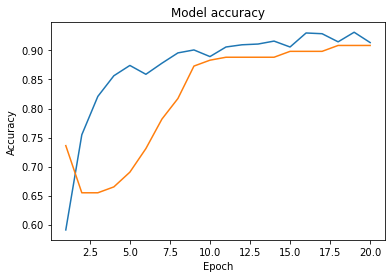

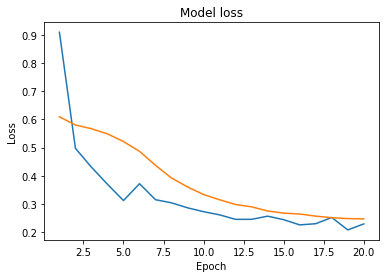

In [26]:
plot_learningCurve(history, epochs)

In [27]:
### Adding MaxPool

Epoch 1/50
25/25 [==============================] - 2s 21ms/step - loss: 1.0224 - accuracy: 0.5163 - val_loss: 0.6304 - val_accuracy: 0.6142
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.9348 - accuracy: 0.5855 - val_loss: 0.6099 - val_accuracy: 0.7817
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.7832 - accuracy: 0.6551 - val_loss: 0.5896 - val_accuracy: 0.7665
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6690 - accuracy: 0.6608 - val_loss: 0.5706 - val_accuracy: 0.7563
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6738 - accuracy: 0.6700 - val_loss: 0.5504 - val_accuracy: 0.7462
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6774 - accuracy: 0.6885 - val_loss: 0.5280 - val_accuracy: 0.7563
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6413 - accuracy: 0.7060 - val_loss: 0.5049 - val_accuracy: 0.7665
Epoch 8/50
25/25 [=

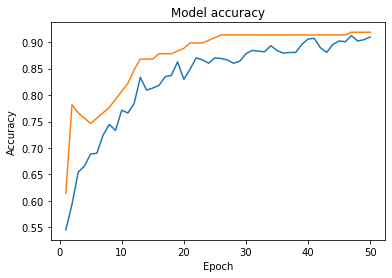

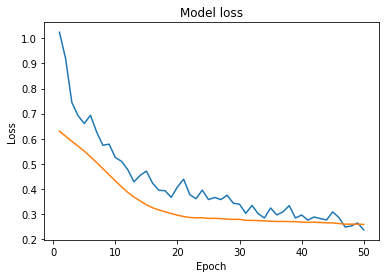

In [28]:
epochs = 50
model = keras.Sequential()
model.add(layers.Conv1D(32, 2, activation='relu', input_shape = x_train[0].shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv1D(32, 2, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(2))
model.add(layers.Dropout(0.5))
          
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
          
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)
plot_learningCurve(history, epochs)